In [1]:
# import the relevant modules
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
#Getting Data retrieved in Project_Part1
file='AllData_2.csv'
df_data_orig=pd.read_csv(file)
df_data=df_data_orig.copy()
#delete any unnamed column produ#Getting Data retrieved in Project_Part1
file='AllData_2.csv'
df_data_orig=pd.read_csv(file)
df_data=df_data_orig.copy()
#delete any unnamed column product of saving DataFrames in range index to csv
df_data.drop(df_data.columns[df_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace=True)
df_data.head()

#getting US regions
file='regions.csv'
df_reg_orig=pd.read_csv(file)
df_reg=df_reg_orig.copy()

#Add column Region to the DataFrame
for reg in df_reg.columns:
    #getting the data for th e states of New England
    states=df_reg[reg].dropna()
    list_states=list(states.values)

    idx_region=df_data.index[df_data['state'].isin(list_states)]
    df_data.loc[idx_region,'region']=reg#ct of saving DataFrames in range index to csv
df_data.drop(df_data.columns[df_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace=True)
df_data.head()

#getting US regions
file='regions.csv'
df_reg_orig=pd.read_csv(file)
df_reg=df_reg_orig.copy()

#Add column Region to the DataFrame
for reg in df_reg.columns:
    #getting the data for th e states of New England
    states=df_reg[reg].dropna()
    list_states=list(states.values)

    idx_region=df_data.index[df_data['state'].isin(list_states)]
    df_data.loc[idx_region,'region']=reg

In [4]:
#Annual and monthly mean in US
def resample_mean_US(df, f='Y'):
   
    df['date']=pd.to_datetime(df['date'], format="%Y-%m-%d")
    if f=='m': 
        df['month']=df['date'].dt.month
    df=df.set_index(['date'])
    df = df.sort_values(by=['date'],ascending=[True])
    df=df.resample(f).mean()
    if f=='m': 
        df=df.groupby(by='month').mean()
    return df

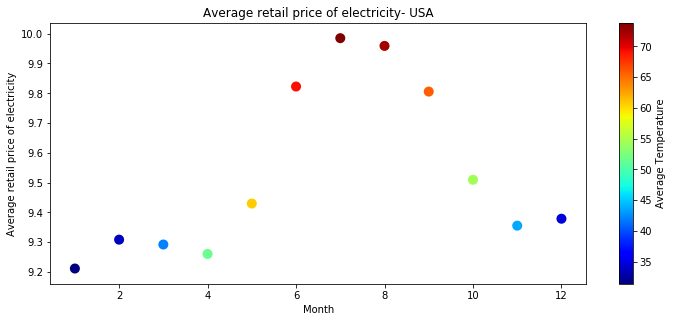

In [5]:


# Electricity Price in USA with respect to average temperature by month
df_monthly_US=resample_mean_US(df_data,f='m')

variable_y='Average retail price of electricity'
variable_x='Month'
title_graph='USA average - Retail price of electricity Vs Temperature'
label_x='Month'
label_y='cents per kilowatthour'
variable_color='TAVG'

#x=df_monthly_US[variable_x]
v_x=df_monthly_US.index
v_y=df_monthly_US[variable_y]
v_z=df_monthly_US[variable_color]

#Format the size of the figure/plot
width=12
height=4.8
plt.rcParams['figure.figsize'] = [width, height]

plt.scatter(x=v_x, y=v_y, c=v_z, cmap='jet', linewidth=4)
        
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.title(variable_y+'- USA')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Average Temperature', rotation=90)

#plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc='best', ncol=5, mode="expand")

#plt.xlim('2001-01-01', '2018-12-31')
#plt.yscale('log')
plt.savefig('img/USA average_2 -PriceVsTemperature per month.png')
plt.show()

